In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('E:\Computer Science\Projects\Senior Year - Term 1\DeepLearning-NeuralNetworksAssignments\Single Layer Perceptron\penguins.csv')
dataset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450


In [3]:
dataset.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               6
body_mass_g          0
dtype: int64

In [4]:
correctGender= ['female','male','female','female','female','female']
nullEntriesIndex = [8, 9, 10, 11, 47, 76]
mask = dataset['gender'].isnull()==True
nullEntries = dataset[mask]
dataset.drop(index=nullEntriesIndex,axis=0,inplace=True)
nullEntries

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
8,Adelie,34.1,18.1,193,NaN,3475
9,Adelie,42.0,20.2,190,NaN,4250
10,Adelie,37.8,17.1,186,NaN,3300
11,Adelie,37.8,17.3,180,NaN,3700
47,Adelie,37.5,18.9,179,NaN,2975
76,Gentoo,44.5,14.3,216,NaN,4100


In [5]:
nullEntries['gender'] = correctGender
nullEntries

C:\Users\NOURKA~1\AppData\Local\Temp/ipykernel_5180/759976395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullEntries['gender'] = correctGender


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
8,Adelie,34.1,18.1,193,female,3475
9,Adelie,42.0,20.2,190,male,4250
10,Adelie,37.8,17.1,186,female,3300
11,Adelie,37.8,17.3,180,female,3700
47,Adelie,37.5,18.9,179,female,2975
76,Gentoo,44.5,14.3,216,female,4100


In [6]:
dataset = dataset.append(nullEntries)
dataset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450
...,...,...,...,...,...,...
9,Adelie,42.0,20.2,190,male,4250
10,Adelie,37.8,17.1,186,female,3300
11,Adelie,37.8,17.3,180,female,3700
47,Adelie,37.5,18.9,179,female,2975


In [7]:
dataset.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               0
body_mass_g          0
dtype: int64

In [8]:
dataset['gender'] = [0 if gender =='female' else 1 for gender in dataset['gender']]

In [9]:
adelie = dataset[dataset['species']=='Adelie']
chinstrap = dataset[dataset['species']=='Chinstrap']
gentoo = dataset[dataset['species']=='Gentoo']
features = dataset.columns.tolist()
features.remove('species')

In [10]:
def drawLinearityBetweenFeatures(featureOne,featureTwo, showAdelie,showChinstrap,showGentoo):
    legendList=[]
    if showAdelie==True:
        plt.scatter(adelie[featureOne],adelie[featureTwo], c="red")
        legendList.append('adelie')
    if showChinstrap==True:
        plt.scatter(chinstrap[featureOne],chinstrap[featureTwo], c= "black")
        legendList.append('chinstrap')
    if showGentoo==True:
        plt.scatter(gentoo[featureOne],gentoo[featureTwo], c= "blue")
        legendList.append('gentoo')
    plt.xlabel(featureOne)
    plt.ylabel(featureTwo)
    plt.legend(legendList,loc="upper right",fontsize=8.5)
    plt.show()

In [11]:
def visualize(showAdelie,showChinstrap,showGentoo):
    for feature in range(len(features)):
        for nextFeature in range (feature+1, len(features)):
            drawLinearityBetweenFeatures(features[feature],features[nextFeature],showAdelie,showChinstrap,showGentoo)

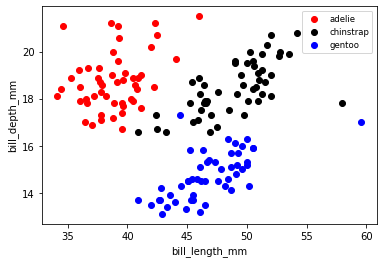

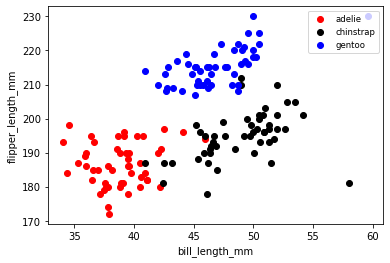

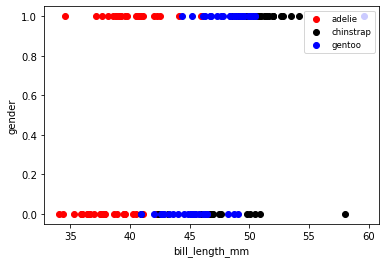

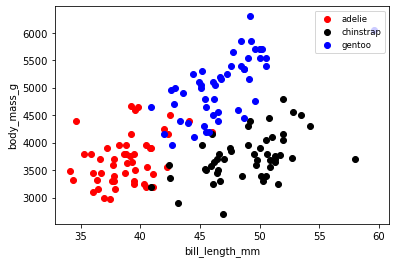

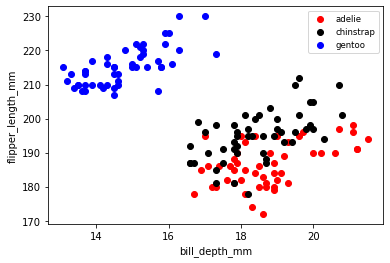

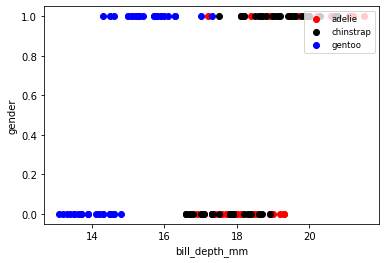

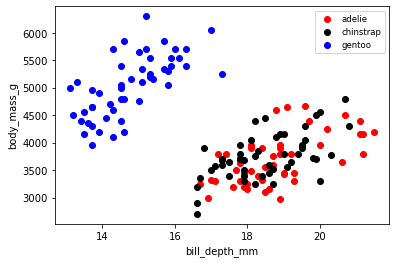

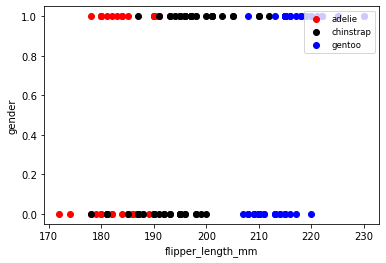

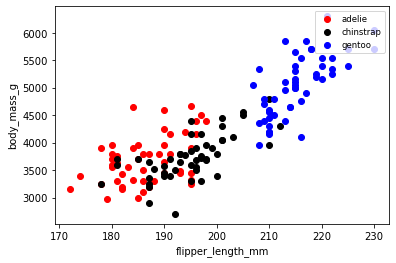

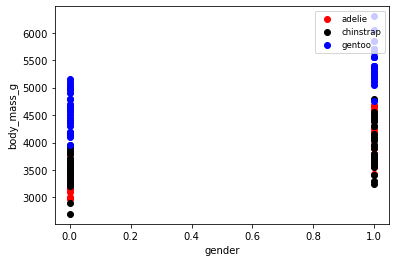

In [12]:
visualize(True,True,True)

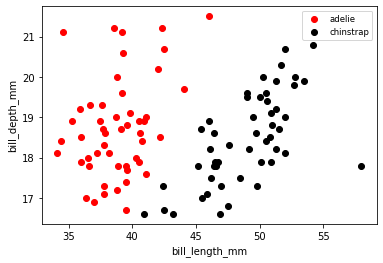

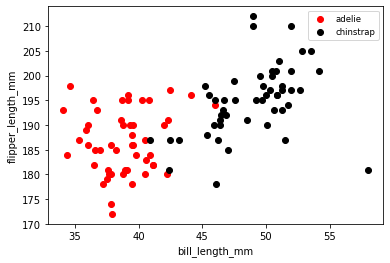

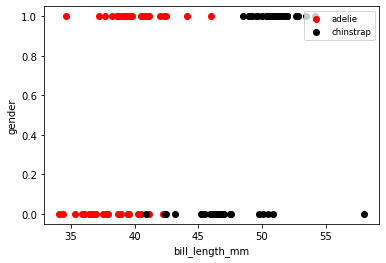

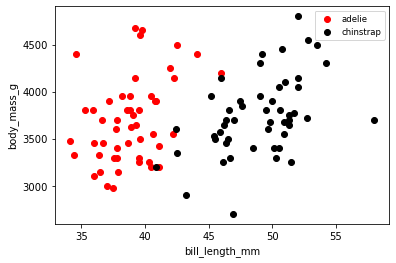

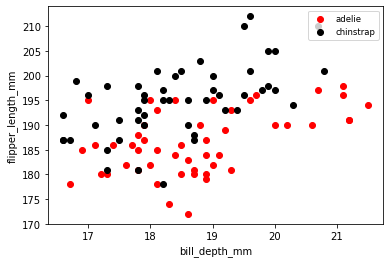

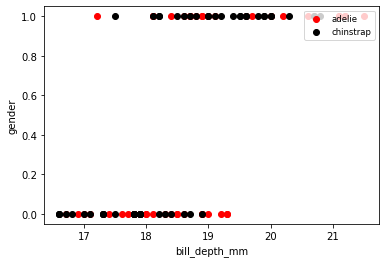

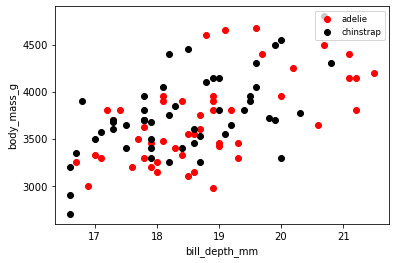

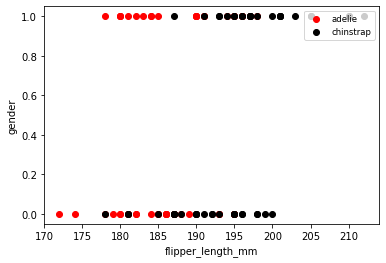

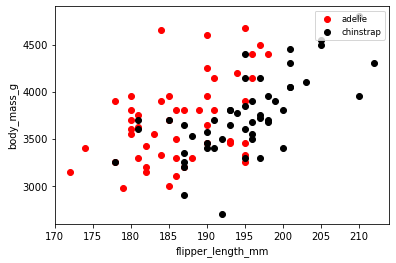

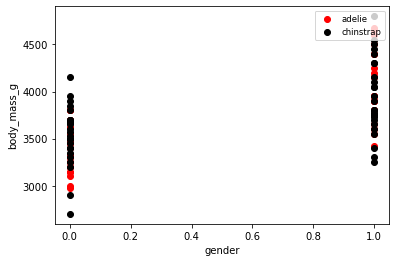

In [13]:
visualize(True,True,False)

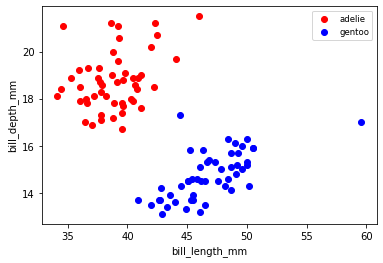

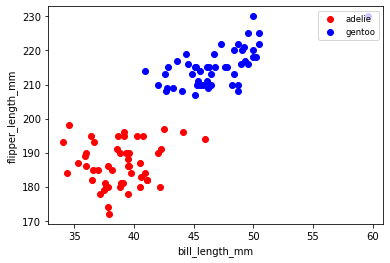

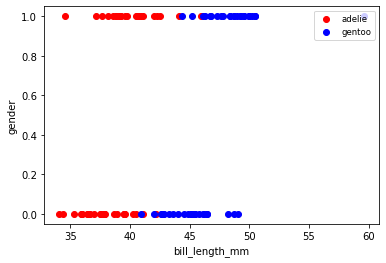

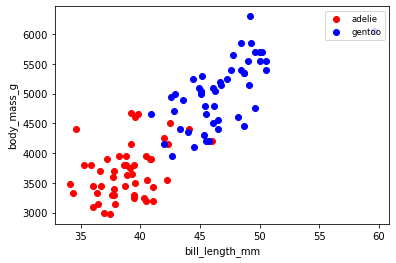

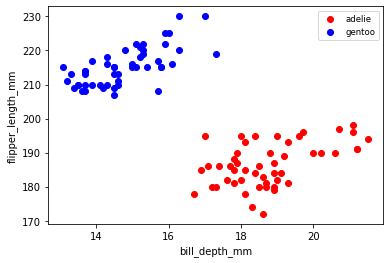

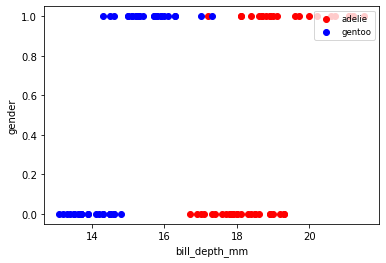

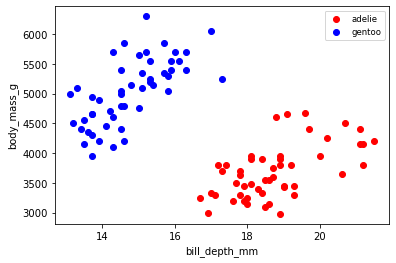

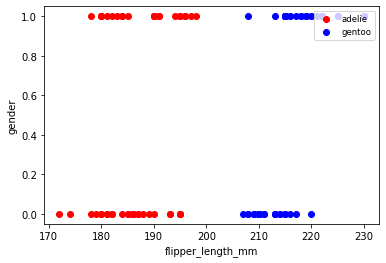

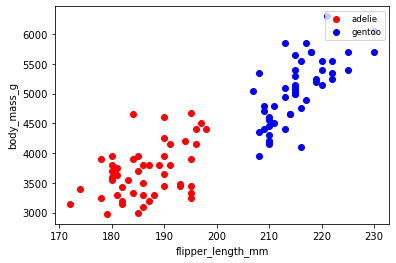

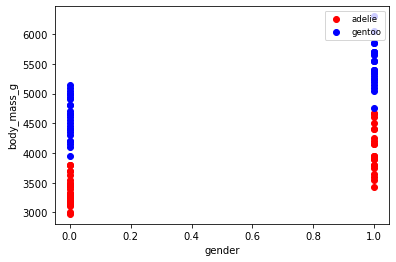

In [14]:
visualize(True,False,True)

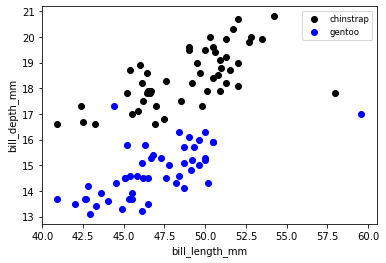

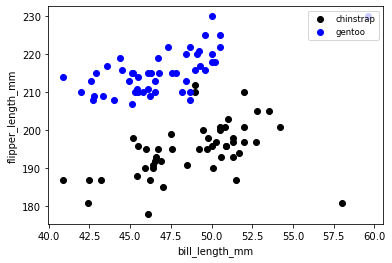

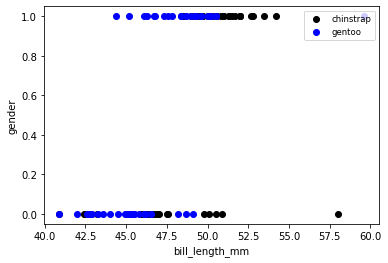

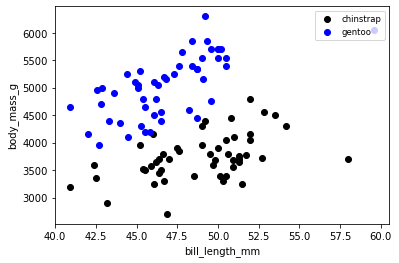

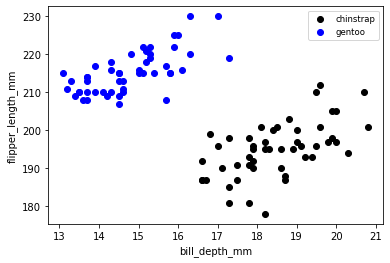

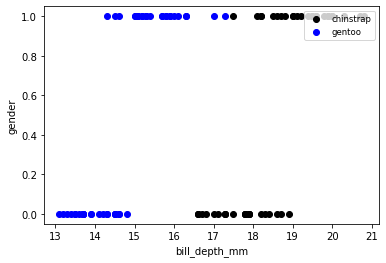

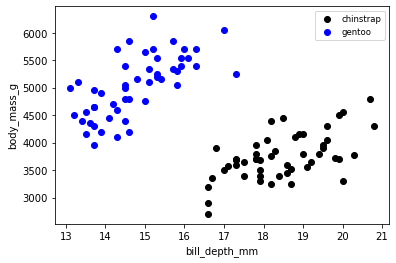

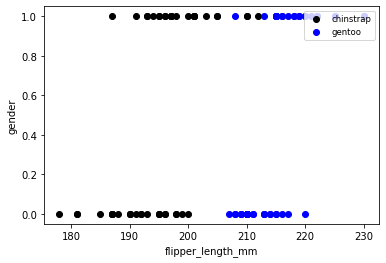

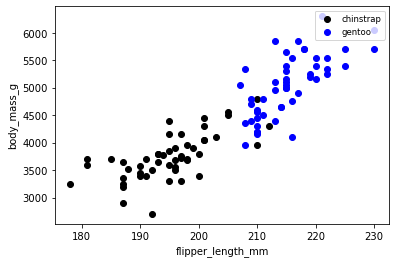

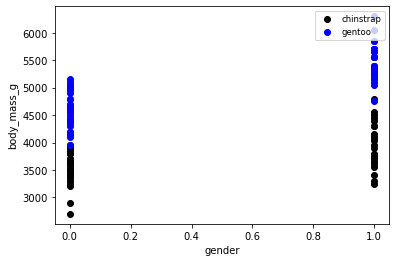

In [15]:
visualize(False,True,True)